# Linear Regression
This notebook demonstrates how to perform Linear Regression on the given dataset.

In [101]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style
from sklearn.preprocessing import LabelEncoder

## Load the Data
Load the data from the provided variables.

In [102]:
# Assuming data is stored in a CSV file
data = pd.read_csv("forestfires.csv", sep=",")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Preprocessing
Handle any necessary data preprocessing steps.

In [103]:
# Select features (X) and target variable (y)
# 
# y = data['area']
label_encoder = LabelEncoder()
data["month"] = label_encoder.fit_transform(data["month"])

data = data[["temp", "wind", "rain", "area", "ISI", "FFMC", "DMC", "DC"]]
predict = "DC"

x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])



## Split the Data
Split the data into training and testing sets.

In [104]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [105]:
 linear = linear_model.LinearRegression()

# # Define the line of best fit
 linear.fit(x_train, y_train)

 acc = linear.score(x_test, y_test)
 
 print(f"Accuracy:{acc}")

Accuracy:0.5279303716782209


In [106]:
#pickle it, save it
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [107]:
# Load the pickle file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [108]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [  8.74084464 -15.17566612 -10.52227035  -0.05096494  -2.77704339
   2.05637283   2.1457098 ]
Intercept: 
 46.20439899290528


## Make Predictions
Use the trained model to make predictions on the test set.

In [109]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

588.0614331520551 [ 23.    4.5   0.    0.   12.2  92.4 117.9] 668.0
551.4921159810276 [ 20.4   4.9   0.    0.    9.6  92.1 111.2] 654.1
544.1129329917443 [22.8  4.   0.   0.   7.1 92.5 88. ] 698.6
551.4921159810276 [ 20.4   4.9   0.    0.    9.6  92.1 111.2] 654.1
618.2440461074905 [ 24.3   1.8   0.    0.    9.   91.6 104.2] 474.9
714.3898087173277 [ 27.7   2.2   0.    0.    9.2  92.9 137. ] 706.4
351.25200480938275 [11.5   4.    0.    8.24  5.5  90.7  44.  ] 92.4
567.9160608313025 [21.4  3.1  0.   0.   6.3 90.2 99.6] 631.2
786.9827224786711 [ 23.9   6.7   0.    0.   13.9  94.8 222.4] 698.6
265.7217376174372 [ 5.5  6.3  0.   0.   9.6 89.3 51.3] 102.2
602.4318290659992 [ 23.4   2.7   0.    0.    5.8  91.1 103.2] 638.8
579.8291320505696 [23.8  1.8  0.   0.   5.6 90.8 84.7] 376.6
478.56376995206256 [20.1   4.9   0.   26.13 15.9  94.3  85.1 ] 692.3
603.8720268317754 [ 20.1    5.4    0.     2.74  10.6   91.4  142.4 ] 601.4
592.1960312541921 [ 16.8    3.1    0.     5.83   7.5   91.5  130.1 ]

# plot the data

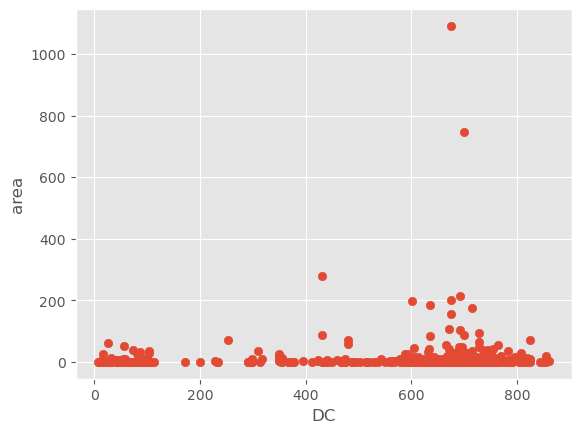

In [110]:
style.use("ggplot")

# Set up a scatter plot
p = "DC"
pyplot.scatter(data[p], data["area"])
pyplot.xlabel(p)
pyplot.ylabel("area")
pyplot.show()